In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


import json
import requests
from pprint import pprint


In [2]:
#Load in data from csv
filepath='Resources/youth_diet_exercise_alcohol.csv'
youth_diet_exercise_alcohol_df= pd.read_csv(filepath,index_col=0)
youth_diet_exercise_alcohol_df

,2001,2003,2005,2007,2009,2011,2013,2017,2019
YRFV,26900.0,16300.0,18200.0,16000.0,19700.0,16300.0,13600.0,11900.0,10600.0
YRPA,NaN,NaN,10300.0,13100.0,15500.0,14100.0,14900.0,11400.0,10000.0
YRBD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5900.0,5000.0


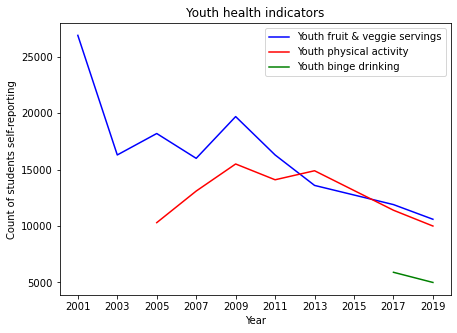

In [3]:
#Plot time series
x = [2001,2003,2005,2007,2009,2011,2013,2017,2019]
y = youth_diet_exercise_alcohol_df.loc['YRFV']
x2 = [2005,2007,2009,2011,2013,2017,2019]
y2=youth_diet_exercise_alcohol_df.loc['YRPA'][2:]
x3 =[2017,2019]
y3 = youth_diet_exercise_alcohol_df.loc['YRBD'][7:]

plt.figure(figsize=(7,5))
plt.xticks(range(2001,2020,2))
plt.xlabel("Year")
plt.ylabel("Count of students self-reporting")
plt.title("Youth health indicators")
plt.plot(x,y,'b',x2,y2,'r',x3,y3,'g')
plt.legend(['Youth fruit & veggie servings','Youth physical activity','Youth binge drinking'],loc='best')
plt.savefig('Images/youth_health_indicators.png',format='png')


The r-value is: 0.4644794217649582


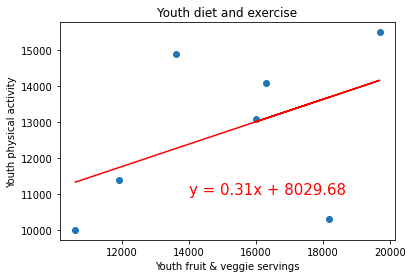

In [4]:
#Make scatter plot and regression
x_values = youth_diet_exercise_alcohol_df.loc['YRFV'][2:]
y_values = youth_diet_exercise_alcohol_df.loc['YRPA'][2:]
correlation = st.pearsonr(x_values,y_values)

plt.xlabel("Youth fruit & veggie servings")
plt.ylabel("Youth physical activity")
plt.title("Youth diet and exercise")
plt.scatter(x_values,y_values)
print(f"The r-value is: {correlation[0]}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (14000,11000),fontsize=15,color="red")
plt.savefig("Images/youthdietandexercise.png", format = 'png')

plt.show()